# Credit Card Fraud Detection

## Description:
In this project, we aim to build a machine learning model to detect fraudulent transactions in credit card data. Credit card fraud is a significant problem affecting financial institutions and consumers worldwide. Traditional rule-based systems for fraud detection often struggle to keep up with the evolving tactics of fraudsters. Therefore, we will leverage machine learning techniques to develop a predictive model that can accurately identify fraudulent transactions while minimizing false positives.

## Dataset:
The dataset used in this project is obtained from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). It contains transactions made by credit cards in September 2013 by cardholders. The dataset is highly imbalanced, with a large number of non-fraudulent transactions and a small number of fraudulent transactions.

## Approach:
1. Data Exploration and Preprocessing: We will explore the dataset to understand its structure and characteristics. This step involves data cleaning, handling missing values, and feature engineering.
2. Model Selection and Training: We will experiment with various machine learning algorithms such as logistic regression, random forest, and support vector machine. We will train these models on the preprocessed data and evaluate their performance using appropriate metrics.
3. Evaluation and Tuning: We will assess the models' performance using metrics such as accuracy, confusion metrics. Additionally, we will tune hyperparameters to optimize the models' performance.
   
## Tools and Libraries:
- Python
- scikit-learn
- numpy
- pandas
- matplotlib
- seaborn

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.shape

(284807, 31)

In [5]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# Class Distribution
Visualizing the distribution of the target variable (fraudulent vs non-fraudulent transactions).

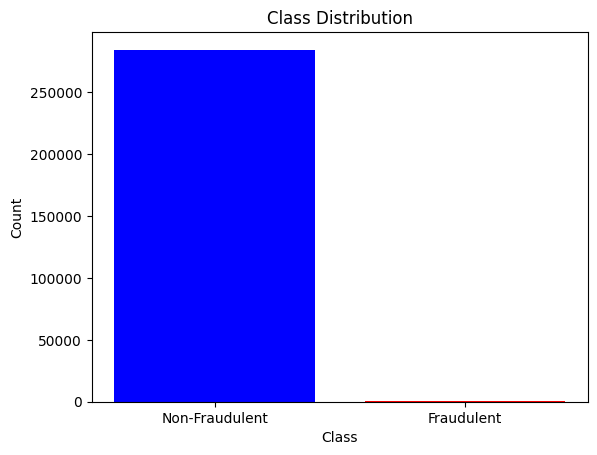

In [8]:
class_distribution = credit_card_data['Class'].value_counts()
plt.bar(class_distribution.index, class_distribution.values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Transaction Amount
Visualizing the distribution of transaction amounts for fraudulent and non-fraudulent transactions.

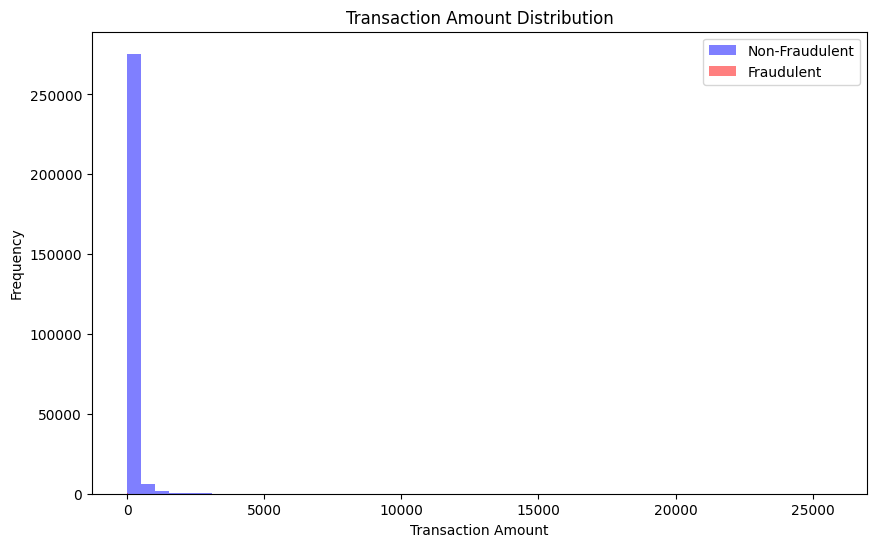

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(credit_card_data[credit_card_data['Class'] == 0]['Amount'], bins=50, alpha=0.5, label='Non-Fraudulent', color='blue')
plt.hist(credit_card_data[credit_card_data['Class'] == 1]['Amount'], bins=50, alpha=0.5, label='Fraudulent', color='red')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution')
plt.legend()
plt.show()

In [10]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [11]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
legit_sample = legit.sample(n=492)

In [16]:
new_dataset = pd.concat([legit_sample,fraud], axis = 0)

In [17]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
58733,48522.0,-1.506557,1.420963,0.750963,-1.442341,-0.701328,-0.683364,-0.231024,1.005063,-0.342530,...,-0.004879,-0.208959,-0.005978,0.015428,-0.242807,0.733251,0.108293,0.095230,3.69,0
2999,2550.0,-1.051814,0.018941,2.175615,1.350192,1.449274,-0.158682,1.057312,-0.972456,0.287355,...,-0.221783,0.343765,-0.438858,0.132192,0.027648,-0.341258,-0.946454,-0.501829,16.34,0
60355,49287.0,1.133808,-0.144894,1.237731,0.808740,-0.823886,0.183098,-0.631347,0.153421,0.777714,...,-0.051092,0.124722,0.046529,0.137028,0.213554,0.343085,0.039416,0.026369,11.50,0
226464,144632.0,-0.397627,0.638765,1.307878,-0.572302,-0.587297,0.023115,-1.020044,-2.559051,0.067242,...,-1.633004,-0.821785,-0.114568,-0.159119,1.091205,0.460374,-0.070443,0.159151,20.90,0
251541,155387.0,-0.466950,1.306899,-0.488400,-0.780806,0.428803,-0.735082,0.692632,0.244106,-0.051185,...,-0.293070,-0.700102,0.037303,-0.712851,-0.295531,0.190354,0.234425,0.085327,10.78,0


In [18]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

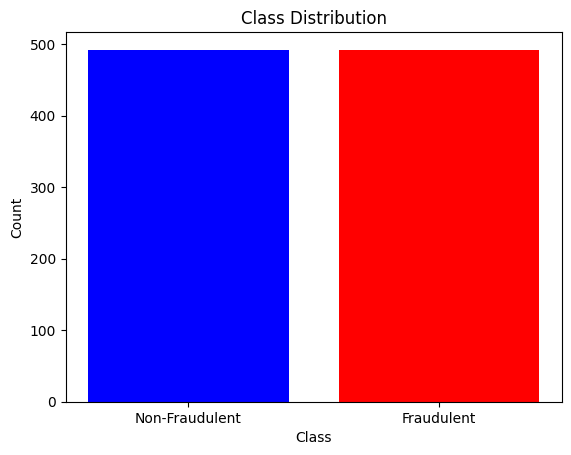

In [19]:
class_distribution = new_dataset['Class'].value_counts()
plt.bar(class_distribution.index, class_distribution.values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

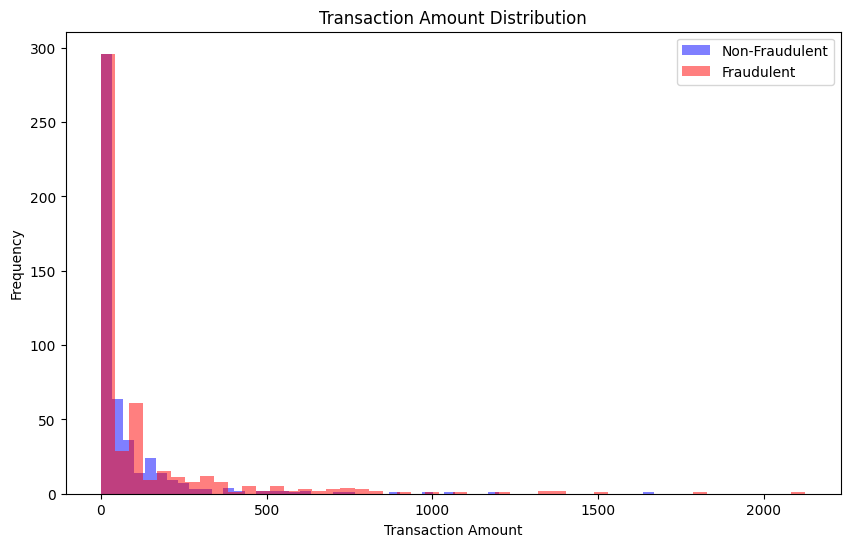

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(new_dataset[new_dataset['Class'] == 0]['Amount'], bins=50, alpha=0.5, label='Non-Fraudulent', color='blue')
plt.hist(new_dataset[new_dataset['Class'] == 1]['Amount'], bins=50, alpha=0.5, label='Fraudulent', color='red')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution')
plt.legend()
plt.show()

# Time of Transactions
Visualizing the distribution of transaction times for fraudulent and non-fraudulent transactions.

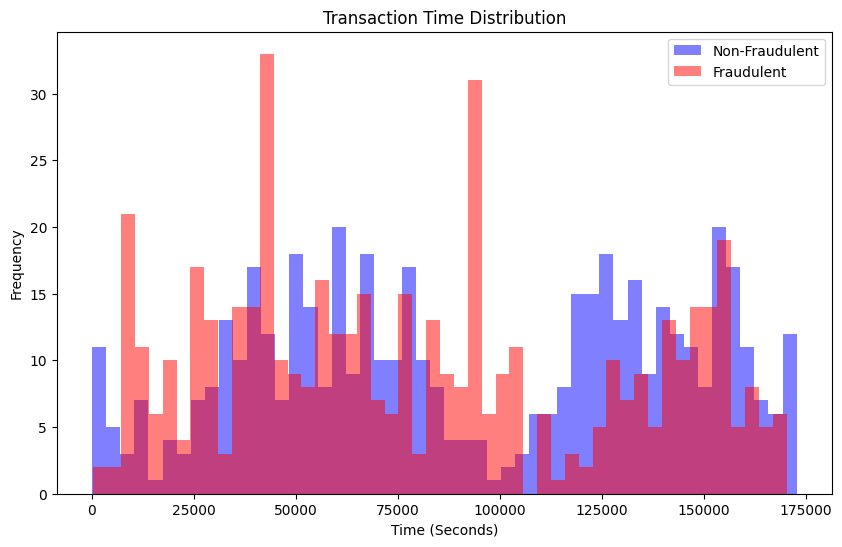

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(new_dataset[new_dataset['Class'] == 0]['Time'], bins=50, alpha=0.5, label='Non-Fraudulent', color='blue')
plt.hist(new_dataset[new_dataset['Class'] == 1]['Time'], bins=50, alpha=0.5, label='Fraudulent', color='red')
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency')
plt.title('Transaction Time Distribution')
plt.legend()
plt.show()

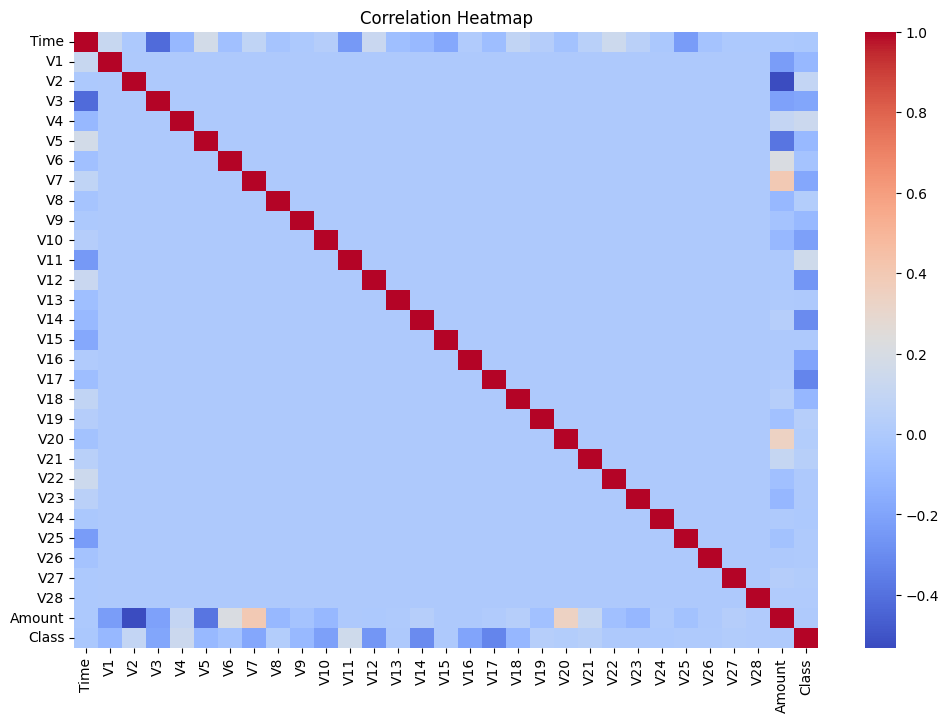

In [22]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(credit_card_data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
X = new_dataset.drop(columns='Class',axis = 1)
Y = new_dataset['Class']

In [24]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
58733,48522.0,-1.506557,1.420963,0.750963,-1.442341,-0.701328,-0.683364,-0.231024,1.005063,-0.342530,...,-0.070274,-0.004879,-0.208959,-0.005978,0.015428,-0.242807,0.733251,0.108293,0.095230,3.69
2999,2550.0,-1.051814,0.018941,2.175615,1.350192,1.449274,-0.158682,1.057312,-0.972456,0.287355,...,0.146337,-0.221783,0.343765,-0.438858,0.132192,0.027648,-0.341258,-0.946454,-0.501829,16.34
60355,49287.0,1.133808,-0.144894,1.237731,0.808740,-0.823886,0.183098,-0.631347,0.153421,0.777714,...,-0.064469,-0.051092,0.124722,0.046529,0.137028,0.213554,0.343085,0.039416,0.026369,11.50
226464,144632.0,-0.397627,0.638765,1.307878,-0.572302,-0.587297,0.023115,-1.020044,-2.559051,0.067242,...,0.534069,-1.633004,-0.821785,-0.114568,-0.159119,1.091205,0.460374,-0.070443,0.159151,20.90
251541,155387.0,-0.466950,1.306899,-0.488400,-0.780806,0.428803,-0.735082,0.692632,0.244106,-0.051185,...,0.035541,-0.293070,-0.700102,0.037303,-0.712851,-0.295531,0.190354,0.234425,0.085327,10.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [25]:
Y

58733     0
2999      0
60355     0
226464    0
251541    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [26]:
X_train, X_test , Y_train, Y_test = train_test_split(X , Y , test_size = 0.2, stratify = Y, random_state = 2)

# Logistic Regression Model

In [27]:
model = LogisticRegression(max_iter = 10000)

In [28]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [29]:
X_train_prediction = model.predict(X_train)

In [30]:
Y_pred = model.predict(X_test)

In [31]:
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [32]:
training_data_accuracy

0.9542566709021602

In [33]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [34]:
test_data_accuracy

0.9390862944162437

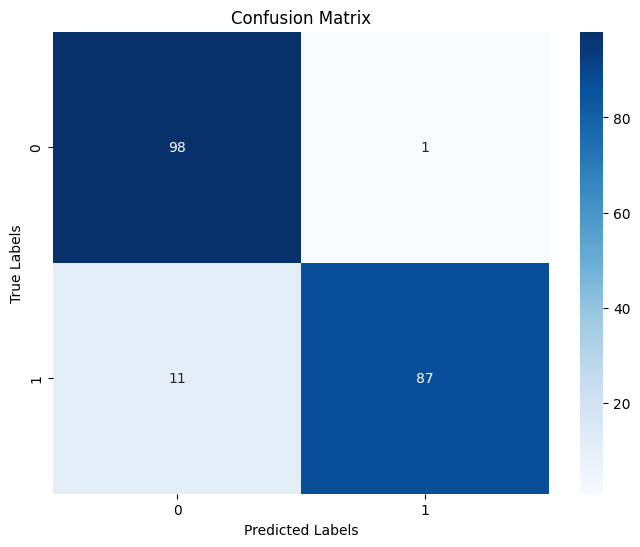

In [35]:
cm = confusion_matrix(Y_test, Y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Random Forest Model

In [36]:
# Creating and training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = rf_model.predict(X_test)

# Evaluating the model
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Random Forest Model Evaluation:
Accuracy: 0.9289340101522843


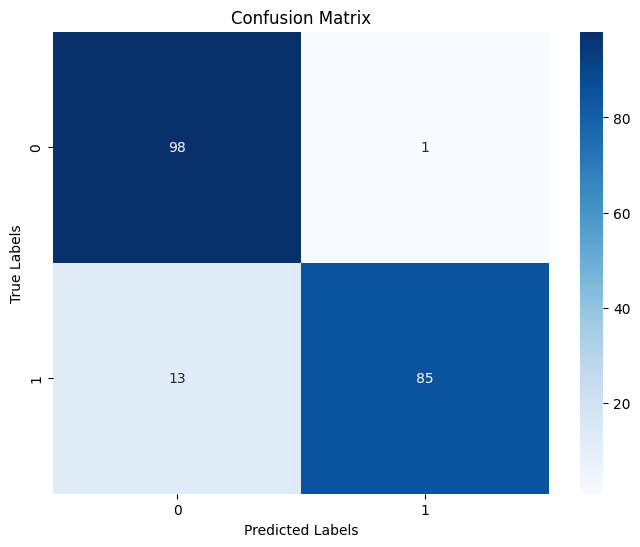

In [37]:
cm = confusion_matrix(Y_test, Y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# SVM Model

In [38]:
# Creating and training the SVM model
svm_model = SVC()
svm_model.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = svm_model.predict(X_test)

# Evaluating the model
print("SVM Model Evaluation:")
print("Accuracy:", accuracy_score(Y_test, Y_pred))

SVM Model Evaluation:
Accuracy: 0.5482233502538071


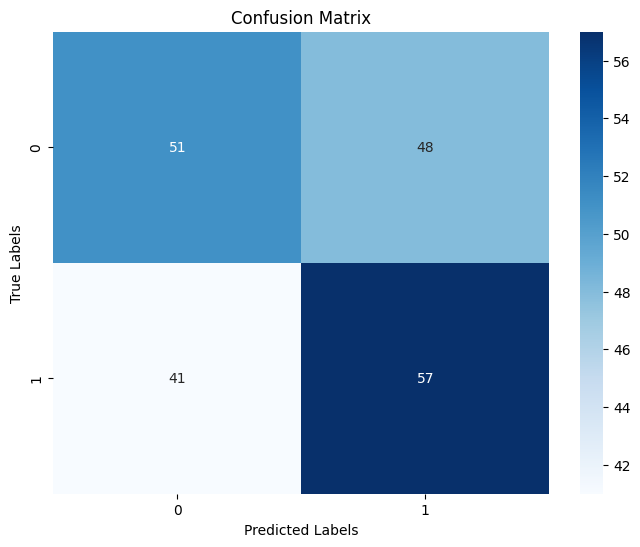

In [39]:
cm = confusion_matrix(Y_test, Y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# CONCLUSION

Based on the comparison of SVM, Logistic Regression, and Random Forest Classification models for credit card fraud detection:

Logistic Regression demonstrates the highest accuracy among the three models, making it the preferred choice for fraud detection in this context.

The interpretability and computational efficiency of Logistic Regression further strengthen its suitability for real-world deployment, offering a balance between performance and practicality.